In [1]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sentence = "The cat and dog were playing with each other."
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Tokenize and get embeddings
inputs = tokenizer(sentence, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[0]  # shape: (seq_len, hidden_size)

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

## Reduce to 2D plot and visualise

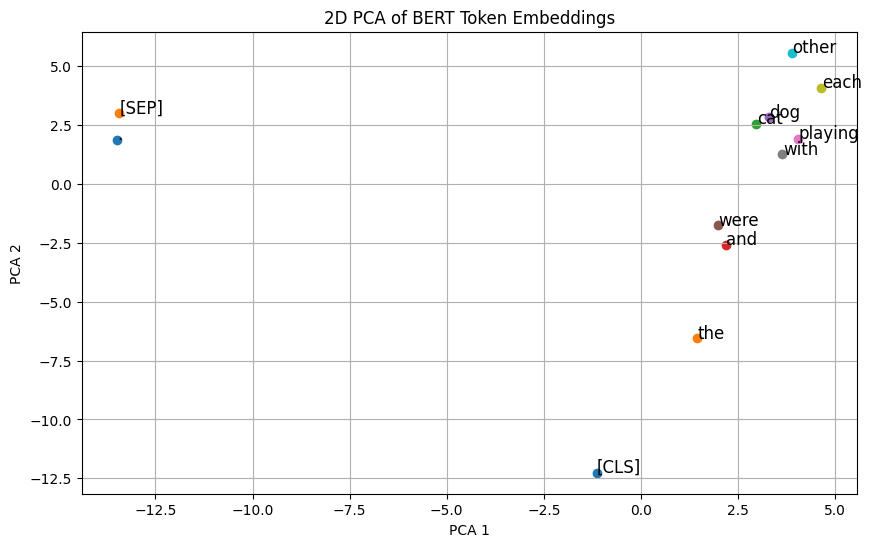

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce from 768 to 2 dimensions
embeddings_np = embeddings.numpy()
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings_np)

# Visualize
plt.figure(figsize=(10, 6))
for i, token in enumerate(tokens):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, token, fontsize=12)
plt.title("2D PCA of BERT Token Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()